In [2]:
import networkx as nx 
import matplotlib.pyplot as plt
from networkx import bipartite

In [3]:
pip install hopcroftkarp

Note: you may need to restart the kernel to use updated packages.


In [4]:
conda install -c conda-forge hopcroftkarp # from hopcroftkarp import HopcroftKarp가 안되서 업뎃 했음 
# Hopcrofkarp는 maximal matching 찾는 알고리즘임 

SyntaxError: invalid syntax (<ipython-input-4-d4be32c2f5a0>, line 1)

In [4]:
conda update -n base -c defaults conda

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\sbie\Anaconda3

  added / updated specs:
    - conda


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    backports.functools_lru_cache-1.6.1|             py_0          11 KB
    conda-4.8.1                |           py37_0         2.8 MB
    future-0.18.2              |           py37_0         656 KB
    ------------------------------------------------------------
                                           Total:         3.5 MB

The following packages will be UPDATED:

  backports.functoo~                               1.5-py_2 --> 1.6.1-py_0
  conda                     conda-forge::conda-4.8.0-py37_1 --> pkgs/main::conda-4.8.1-py37_0
  future                                      0.17.1-py37_0 --> 0.18.2-py37_0




future-0.18.2        | 656 KB    |            |   0% 
future-0.18.2        | 656 

In [5]:
from hopcroftkarp import HopcroftKarp

In [6]:
g = nx.DiGraph() ## directed graphs with self loops 
edges = [('1', '2'),('1', '3'),('3', '4'),('3', '5'),('3','6'),('5','6'),('6', '7')]
g.add_edges_from(edges)
graph = {}
for x in edges:
    if x[0] not in graph.keys():
        graph[x[0]] = set() 
        graph[x[0]].update(x[1])
        # graph[x[0]] = 각 ()로 묶인 node들 중 첫번째 node 예) ('1','2'), ('1','3') 이니까 1 = (2, 3)
        # 그 set을 같이 이루어진 node 번호를 추가해서 update 시킴 (x[1] = ()안 두번째 node number)
    else :
        graph[x[0]].update(x[1])

In [8]:
graph2 = dict(((str(key)+'*'), value) for (key, value) in graph.items()) # bipartite graph ??
hk = HopcroftKarp(graph2)

set_of_matched = set()
matched_nodes_list=[]
for i in range(1000):
    max_matching = HopcroftKarp(graph2).maximum_matching()
    matched_nodes = set()
    for value in set(max_matching.values()):
        if value in list(g.nodes):
            matched_nodes.add(value)
        else :
            continue
    if matched_nodes not in matched_nodes_list:
        matched_nodes_list.append(matched_nodes)
print(matched_nodes_list)

[{'6', '2', '4', '7'}]


C:\Users\sbie\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
C:\Users\sbie\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


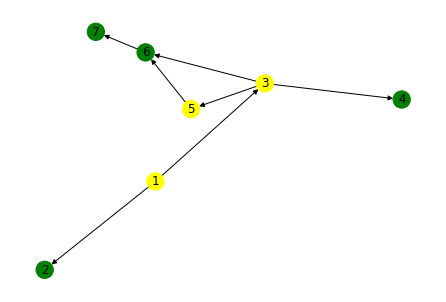

In [9]:
green_nodes = matched_nodes
node_colors = ['yellow' if not n in green_nodes else 'green' for n in g.nodes()]
nx.draw(g,pos = nx.spring_layout(g,scale=2), node_color=node_colors, with_labels = True) # layout = spring, spectral, shell, circular, kamada_kawai, random
plt.show()

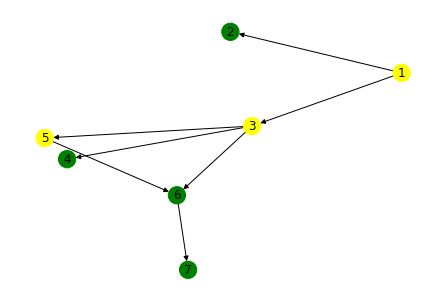

In [10]:
green_nodes = matched_nodes
node_colors = ['yellow' if not n in green_nodes else 'green' for n in g.nodes()]
nx.draw(g,pos = nx.kamada_kawai_layout(g,scale=2), node_color=node_colors, with_labels = True) # layout = spring, spectral, shell, circular, kamada_kawai, random
plt.show()

## Practice2 : Find all maximal matching and matched nodes combination 

In [23]:
  '''directed graph, with edges in <match> pointing from set-0
                (bipartite attribute ==0) to set-1 (bipartite attrbiute==1),
                and the other edges in <g> but not in <matching> pointing
                from set-1 to set-0.'''

def formDirected(g, match):
    d = nx.DiGraph()
    
    for ee in g.edges():
        if ee in match or (ee[1],ee[0]) in match :
            if g.node[ee[0]]['bipartite']==0:
                d.add_edge(ee[0],ee[1])
            else:
                d.add_edge(ee[1],ee[0])
        else:
            if g.node[ee[0]]['bipartite']==0:
                d.add_edge(ee[1],ee[0])
            else:
                d.add_edge(ee[0],ee[1])

    return d

'''Find all maximum matchings in an undirected bipartite graph. 
    undirected bipartite graph. Nodes are separated by their 'bipartite' attribute.
    Return all matches -> list, each is a list of edges forming a maximum matching of g'''



def enumMaximumMatching(g):
    all_matches = []
    match = bipartite.hopcroft_karp_matching(g)
    match2=[]
    for kk, vv in match.items():
        if g.node[kk]['bipartite']==0:
            match2.append((kk,vv))
        match=match2
        all_matches.append(match)
        all_matches=enumMaximumMatchingIter(g,match,all_matches,None)
        return all_matches
    

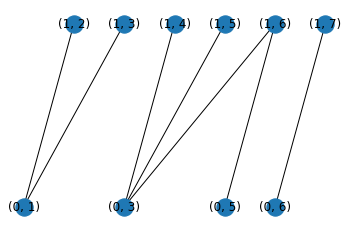

AmbiguousSolution: Disconnected graph: Ambiguous solution for bipartite sets.

In [27]:
import networkx as nx
from networkx import bipartite

def plotGraph(graph):
    import matplotlib.pyplot as plt
    fig=plt.figure()
    ax=fig.add_subplot(111)

    pos=[(ii[1],ii[0]) for ii in graph.nodes()]
    pos_dict=dict(zip(graph.nodes(),pos))
    nx.draw(graph,pos=pos_dict,ax=ax,with_labels=True)
    plt.show(block=False)
    return

def formDirected(g,match):
    '''Form directed graph D from G and matching M.

    <g>: undirected bipartite graph. Nodes are separated by their
         'bipartite' attribute.
    <match>: list of edges forming a matching of <g>. 

    Return <d>: directed graph, with edges in <match> pointing from set-0
                (bipartite attribute ==0) to set-1 (bipartite attrbiute==1),
                and the other edges in <g> but not in <matching> pointing
                from set-1 to set-0.
    '''

    d=nx.DiGraph()

    for ee in g.edges():
        if ee in match or (ee[1],ee[0]) in match:
            if g.node[ee[0]]['bipartite']==0:
                d.add_edge(ee[0],ee[1])
            else:
                d.add_edge(ee[1],ee[0])
        else:
            if g.node[ee[0]]['bipartite']==0:
                d.add_edge(ee[1],ee[0])
            else:
                d.add_edge(ee[0],ee[1])

    return d


def enumMaximumMatching(g):
    '''Find all maximum matchings in an undirected bipartite graph.

    <g>: undirected bipartite graph. Nodes are separated by their
         'bipartite' attribute.

    Return <all_matches>: list, each is a list of edges forming a maximum
                          matching of <g>. 
    '''

    all_matches=[]

    #----------------Find one matching M----------------
    match=bipartite.hopcroft_karp_matching(g)

    #---------------Re-orient match arcs---------------
    match2=[]
    for kk,vv in match.items():
        if g.node[kk]['bipartite']==0:
            match2.append((kk,vv))
    match=match2
    all_matches.append(match)

    #-----------------Enter recursion-----------------
    all_matches=enumMaximumMatchingIter(g,match,all_matches,None)

    return all_matches


def enumMaximumMatchingIter(g,match,all_matches,add_e=None):
    '''Recurively search maximum matchings.

    <g>: undirected bipartite graph. Nodes are separated by their
         'bipartite' attribute.
    <match>: list of edges forming one maximum matching of <g>.
    <all_matches>: list, each is a list of edges forming a maximum
                   matching of <g>. Newly found matchings will be appended
                   into this list.
    <add_e>: tuple, the edge used to form subproblems. If not None,
             will be added to each newly found matchings.

    Return <all_matches>: updated list of all maximum matchings.
    '''

    #---------------Form directed graph D---------------
    d=formDirected(g,match)

    #-----------------Find cycles in D-----------------
    cycles=list(nx.simple_cycles(d))

    if len(cycles)==0:

        #---------If no cycle, find a feasible path---------
        all_uncovered=set(g.node).difference(set([ii[0] for ii in match]))
        all_uncovered=all_uncovered.difference(set([ii[1] for ii in match]))
        all_uncovered=list(all_uncovered)

        #--------------If no path, terminiate--------------
        if len(all_uncovered)==0:
            return all_matches

        #----------Find a length 2 feasible path----------
        idx=0
        uncovered=all_uncovered[idx]
        while True:

            if uncovered not in nx.isolates(g):
                paths=nx.single_source_shortest_path(d,uncovered,cutoff=2)
                len2paths=[vv for kk,vv in paths.items() if len(vv)==3]

                if len(len2paths)>0:
                    reversed=False
                    break

                #----------------Try reversed path----------------
                paths_rev=nx.single_source_shortest_path(d.reverse(),uncovered,cutoff=2)
                len2paths=[vv for kk,vv in paths_rev.items() if len(vv)==3]

                if len(len2paths)>0:
                    reversed=True
                    break

            idx+=1
            if idx>len(all_uncovered)-1:
                return all_matches

            uncovered=all_uncovered[idx]

        #-------------Create a new matching M'-------------
        len2path=len2paths[0]
        if reversed:
            len2path=len2path[::-1]
        len2path=zip(len2path[:-1],len2path[1:])

        new_match=[]
        for ee in d.edges():
            if ee in len2path:
                if g.node[ee[1]]['bipartite']==0:
                    new_match.append((ee[1],ee[0]))
            else:
                if g.node[ee[0]]['bipartite']==0:
                    new_match.append(ee)

        if add_e is not None:
            for ii in add_e:
                new_match.append(ii)

        all_matches.append(new_match)

        #---------------------Select e---------------------
        e=set(len2path).difference(set(match))
        e=list(e)[0]

        #-----------------Form subproblems-----------------
        g_plus=g.copy()
        g_minus=g.copy()
        g_plus.remove_node(e[0])
        g_plus.remove_node(e[1])

        g_minus.remove_edge(e[0],e[1])

        add_e_new=[e,]
        if add_e is not None:
            add_e_new.extend(add_e)

        all_matches=enumMaximumMatchingIter(g_minus,match,all_matches,add_e)
        all_matches=enumMaximumMatchingIter(g_plus,new_match,all_matches,add_e_new)

    else:
        #----------------Find a cycle in D----------------
        cycle=cycles[0]
        cycle.append(cycle[0])
        cycle=zip(cycle[:-1],cycle[1:])

        #-------------Create a new matching M'-------------
        new_match=[]
        for ee in d.edges():
            if ee in cycle:
                if g.node[ee[1]]['bipartite']==0:
                    new_match.append((ee[1],ee[0]))
            else:
                if g.node[ee[0]]['bipartite']==0:
                    new_match.append(ee)

        if add_e is not None:
            for ii in add_e:
                new_match.append(ii)

        all_matches.append(new_match)

        #-----------------Choose an edge E-----------------
        e=set(match).intersection(set(cycle))
        e=list(e)[0]

        #-----------------Form subproblems-----------------
        g_plus=g.copy()
        g_minus=g.copy()
        g_plus.remove_node(e[0])
        g_plus.remove_node(e[1])
        g_minus.remove_edge(e[0],e[1])

        add_e_new=[e,]
        if add_e is not None:
            add_e_new.extend(add_e)

        all_matches=enumMaximumMatchingIter(g_plus,match,all_matches,add_e_new)
        all_matches=enumMaximumMatchingIter(g_minus,new_match,all_matches,add_e)

    return all_matches

if __name__=='__main__':
    g=nx.Graph()
    edges=[
            [(1,2), (0,1)],
            [(1,3), (0,1)],
            [(1,4), (0,3)],
            [(1,5), (0,3)],
            [(1,6), (0,3)],
            [(1,6), (0,5)],
            [(1,7), (0,6)]]

    for ii in edges:
        g.add_node(ii[0],bipartite=0)
        g.add_node(ii[1],bipartite=1)

    g.add_edges_from(edges)
    plotGraph(g)

    all_matches=enumMaximumMatching(g)

    for mm in all_matches:
        g_match=nx.Graph()
        for ii in mm:
            g_match.add_edge(ii[0],ii[1])
        plotGraph(g_match)